# Inverse distance weighting (IDW) 
- One of Geographic information system interpolation
- Goal : (latitude, longitude, air pollution <- interpolation!)

## 1. Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import idw
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import os

## 2. Ground Truth

In [42]:
dataset = pd.read_csv("air_pollution_new/Hour_1.csv", header = None)
data = dataset.values[:,:]

latitude = data[:,1]
longitude = data[:,2]
z = data[:,3]

In [43]:
coo = []

for i in range(len(z)):
    coo.append([latitude[i], longitude[i]])

In [44]:
zz = []
for i in range(len(z)):
    zz.append([z[i]])

In [45]:
coo = np.array(coo)
zz = np.array(zz)
coo1 = np.array(coo[:,0])
coo2 = np.array(coo[:,1])

In [46]:
print(coo.shape)
print(coo1.shape)
print(coo2.shape)
print(zz.shape)

(314, 2)
(314,)
(314,)
(314, 1)


In [47]:
# create sample points with structured scores
X1 = coo
z1 = zz

In [48]:
print("Shape :", X1.shape)
print("MAX :", np.max(X1))
print("MIN :", np.min(X1))

Shape : (314, 2)
MAX : 1271.7
MIN : 33.256


## 3. Train and Test

In [49]:
idw_tree = idw.tree(X1, z1)

In [76]:
new_lat = np.linspace(34,37.5,100)
new_lon = np.linspace(126.5,130,100)

print(new_lat.shape)
print(new_lon.shape)

(100,)
(100,)


In [77]:
X2 = np.meshgrid(new_lat, new_lon)
np.shape(X2)

(2, 100, 100)

In [78]:
grid_shape = X2[0].shape

In [79]:
X2 = np.reshape(X2, (2, -1)).T
X2.shape

(10000, 2)

In [80]:
z2 = idw_tree(X2)

In [81]:
print(X2.shape)
print(z2.shape)

(10000, 2)
(10000,)


## 4. Results

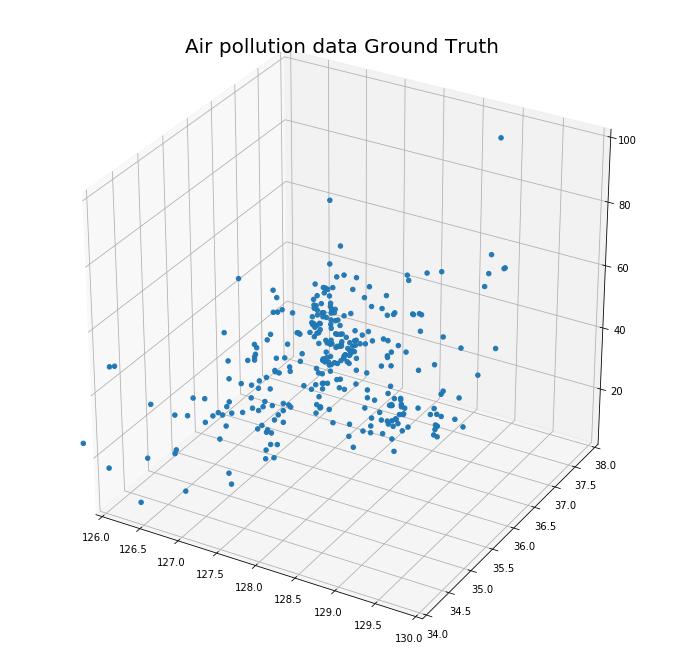

In [82]:
plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
ax1 = fig.gca(projection = '3d')
ax1.scatter(coo2,coo1, z1)
ax1.axis([126, 130, 34, 38])

plt.title("Air pollution data Ground Truth", fontsize=20)
plt.savefig("fig4.jpg")
plt.show()

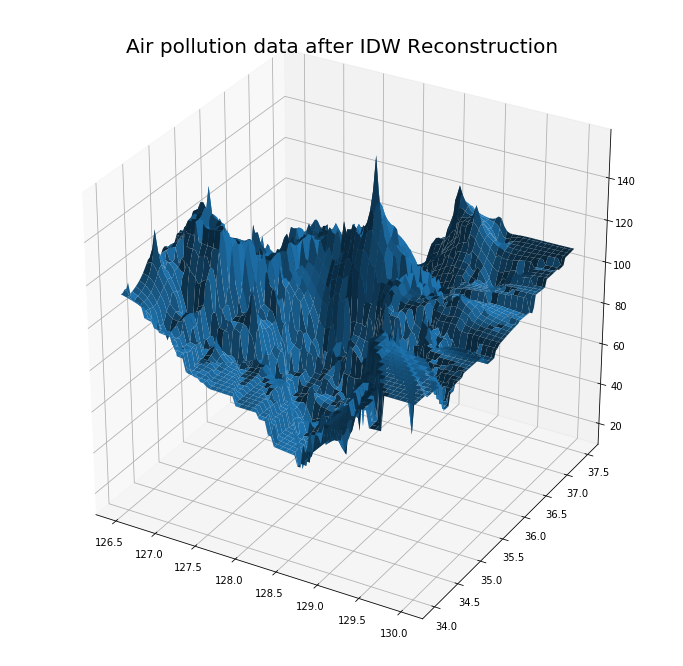

In [94]:
X21, X22 = np.meshgrid(new_lat, new_lon)

plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
ax3 = fig.gca(projection = '3d')
ax3.plot_surface(X22, X21 , z2.reshape(grid_shape))

plt.title("Air pollution data after IDW Reconstruction", fontsize=20)
# plt.savefig("fig5.jpg")
plt.show()

## 5. Make Dataset

In [84]:
print(X21.shape)
print(X22.shape)
print(z2.reshape(grid_shape).shape)

(100, 100)
(100, 100)
(100, 100)


In [89]:
np.savetxt('Interpolation_air_pollution/Hour1_inter_lat.txt', X21)
np.savetxt('Interpolation_air_pollution/Hour1_inter_lon.txt', X22)
np.savetxt('Interpolation_air_pollution/Hour1_inter_p.txt', z2.reshape(grid_shape))

## 6. Save for 24 hours

In [92]:
for hour in range(24) :
    path = os.path.join(os.getcwd(), 'air_pollution_new', 'Hour_{}'.format(hour+1) + '.csv')
    dataset = pd.read_csv(path, encoding = 'cp949', header = None)
    data = dataset.values[:,:]

    latitude = data[:,1]
    longitude = data[:,2]
    z = data[:,3]
    
    coo = []

    for i in range(len(z)):
        coo.append([latitude[i], longitude[i]])
        
    zz = []
    for i in range(len(z)):
        zz.append([z[i]])
    
    coo = np.array(coo)
    zz = np.array(zz)
    coo1 = np.array(coo[:,0])
    coo2 = np.array(coo[:,1])
    
    X1 = coo
    z1 = zz
    
    idw_tree = idw.tree(X1, z1)
    
#     new_lat = np.arange(34, 37.51, 0.0351)
#     new_lon = np.arange(126, 130.001, 0.0403)  
    new_lat = np.linspace(34,37.5,100)
    new_lon = np.linspace(126.5,130,100)

    
    X21, X22 = np.meshgrid(new_lat, new_lon)
    
    X2 = np.meshgrid(new_lat, new_lon)
    grid_shape = X2[0].shape
    X2 = np.reshape(X2, (2, -1)).T
    z2 = idw_tree(X2)
    
    print(z2)
    np.savetxt('Interpolation_air_pollution/' + 'Hour_{}'.format(hour+1) + '_inter_lat.txt', X21)
    np.savetxt('Interpolation_air_pollution/' + 'Hour_{}'.format(hour+1) + '_inter_lon.txt', X22)
    np.savetxt('Interpolation_air_pollution/' + 'Hour_{}'.format(hour+1) + '_inter_p.txt', z2.reshape(grid_shape))

[30.88866497 29.82948917 29.62499847 ... 53.21792513 53.36336991
 53.50597942]
[32.0601678  31.17615205 27.51836312 ... 46.57736466 46.7050854
 46.83119597]
[27.34881286 26.93492746 23.70147327 ... 40.20395264 40.11906613
 40.03910194]
[23.01460683 22.98391465 22.65177818 ... 27.60187573 27.51546952
 27.43440579]
[31.44004912 31.00970781 29.47737179 ... 20.90313207 20.82426913
 20.75015788]
[39.82605578 38.96356338 38.6339731  ... 29.1240884  29.06512453
 29.00756421]
[43.52460513 42.7281445  39.50130908 ... 47.36784082 47.4619871
 47.54659537]
[50.67773784 49.35720517 45.95777592 ... 53.59013595 53.70689907
 53.81401095]
[45.0356591  44.69150797 48.6628944  ... 57.54774108 57.66573698
 57.77481353]
[52.38220245 52.05294515 54.0358825  ... 56.94321502 56.94736629
 56.94943891]
[62.03203982 61.356747   64.00091572 ... 55.60896233 55.54084971
 55.47385208]
[58.88097738 58.85538533 56.4824386  ... 69.81669981 69.88527085
 69.94991849]
[66.95718397 66.65404766 64.24547366 ... 73.07792082 7

### Reference
- [1] [inverse_distance_weighting], https://github.com/paulbrodersen/inverse_distance_weighting/blob/master/LICENSE